In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data\data.csv')

In [4]:
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## There are no  missing values

In [8]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [9]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
columns = list(df.columns)
for i in columns:
    print(df[i].unique() , "\n")

['female' 'male'] 

['group B' 'group C' 'group A' 'group D' 'group E'] 

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

['standard' 'free/reduced'] 

['none' 'completed'] 

[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8] 

[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40] 

[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68 

In [12]:
# Numerical and categorical features:
x = df.columns
num_feat = []
cat_feat = []
for i in range(len(x)):
    if df[x[i]].dtype != 'object':
        num_feat.append(x[i])
    else:
        cat_feat.append(x[i])

In [13]:
num_feat , cat_feat


(['math score', 'reading score', 'writing score'],
 ['gender',
  'race/ethnicity',
  'parental level of education',
  'lunch',
  'test preparation course'])

In [14]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [15]:
df['Total Score']  = df['math score']+df['reading score']+df['writing score']
df['Average Score'] = df['Total Score'] /3 

In [16]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [17]:
reading_full = df[df['reading score'] == 100]['Average Score'].count()
writing_full = df[df['writing score'] == 100]['Average Score'].count()
math_full = df[df['math score'] == 100]['Average Score'].count()

print(f"No of students with full marks in maths {math_full}")
print(f"No of students with full marks in writing {writing_full}")
print(f"No of students with full marks in reading {reading_full}")


No of students with full marks in maths 7
No of students with full marks in writing 14
No of students with full marks in reading 17


In [18]:
reading_less20 = df[df['reading score'] <= 20]['Average Score'].count()
writing_less20 = df[df['writing score'] <= 20]['Average Score'].count()
math_less20 = df[df['math score'] <= 20]['Average Score'].count()

print(f"No of students with less than 20 marks in maths {math_less20}")
print(f"No of students with less than 20 marks in writing {writing_less20}")
print(f"No of students with less than 20 marks in reading {reading_less20}")

No of students with less than 20 marks in maths 4
No of students with less than 20 marks in writing 3
No of students with less than 20 marks in reading 1


# Insight : 
worst performance in Maths
Best Performance in Reading

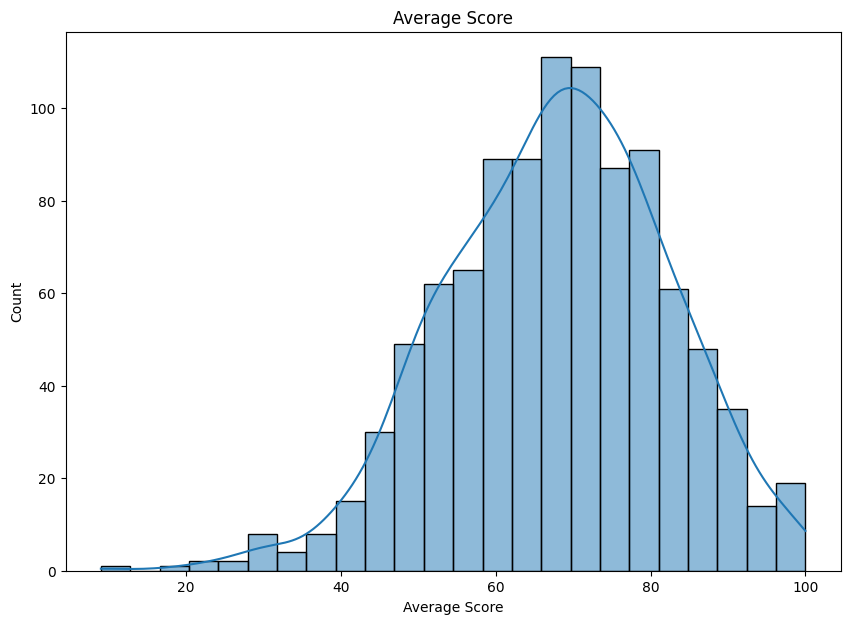

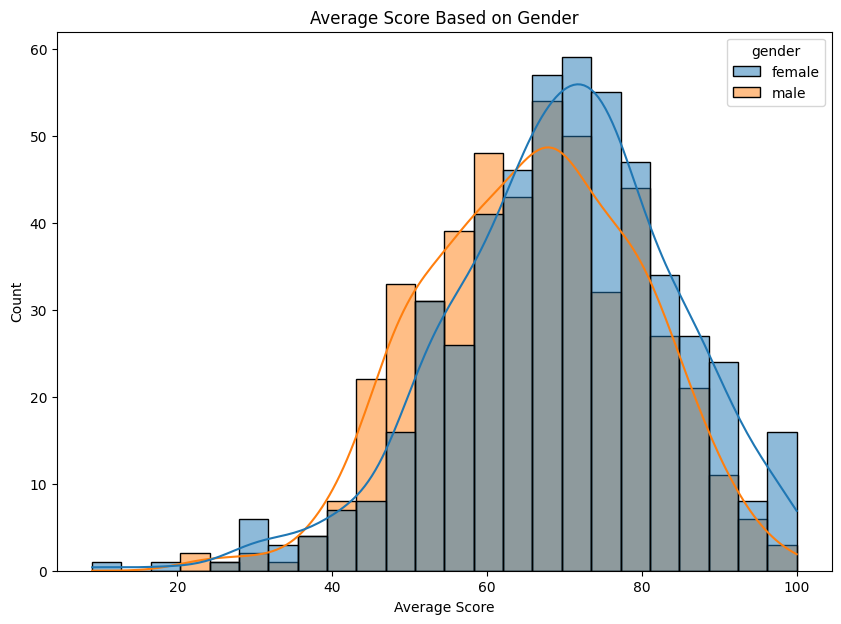

In [19]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='Average Score', kde=True)
plt.title("Average Score")
plt.show()

# Second histogram
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='Average Score', hue='gender' , kde=True)
plt.title("Average Score Based on Gender")
plt.show()


By Average Score female tends to perform better

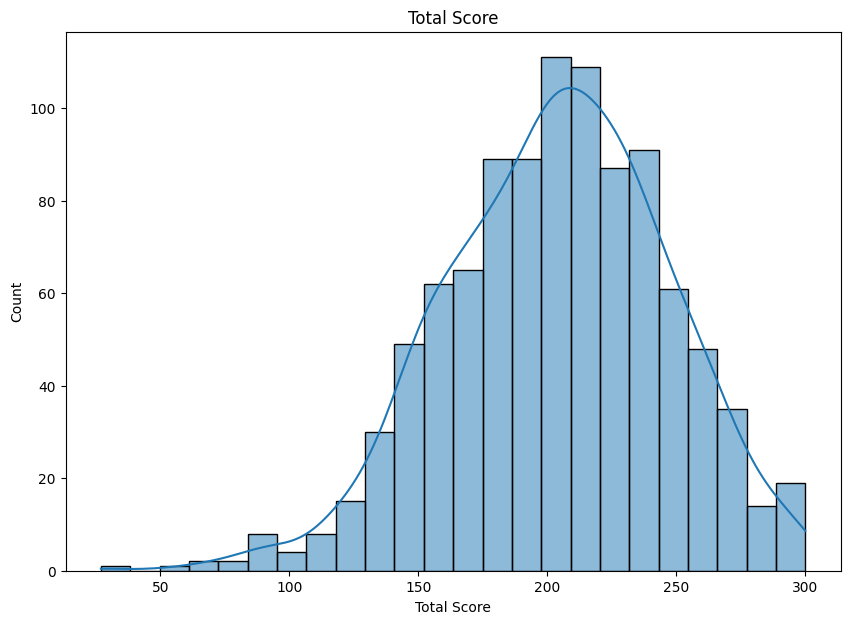

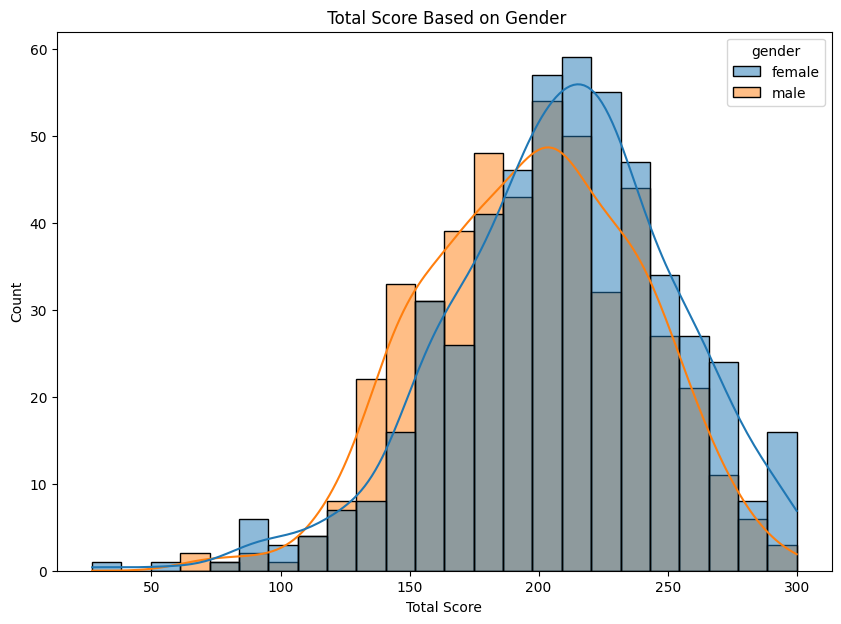

In [20]:
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='Total Score', kde=True)
plt.title("Total Score")
plt.show()

# Second histogram
plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='Total Score', hue='gender', kde=True)
plt.title(" Total Score Based on Gender")
plt.show()


<Axes: xlabel='Average Score', ylabel='Count'>

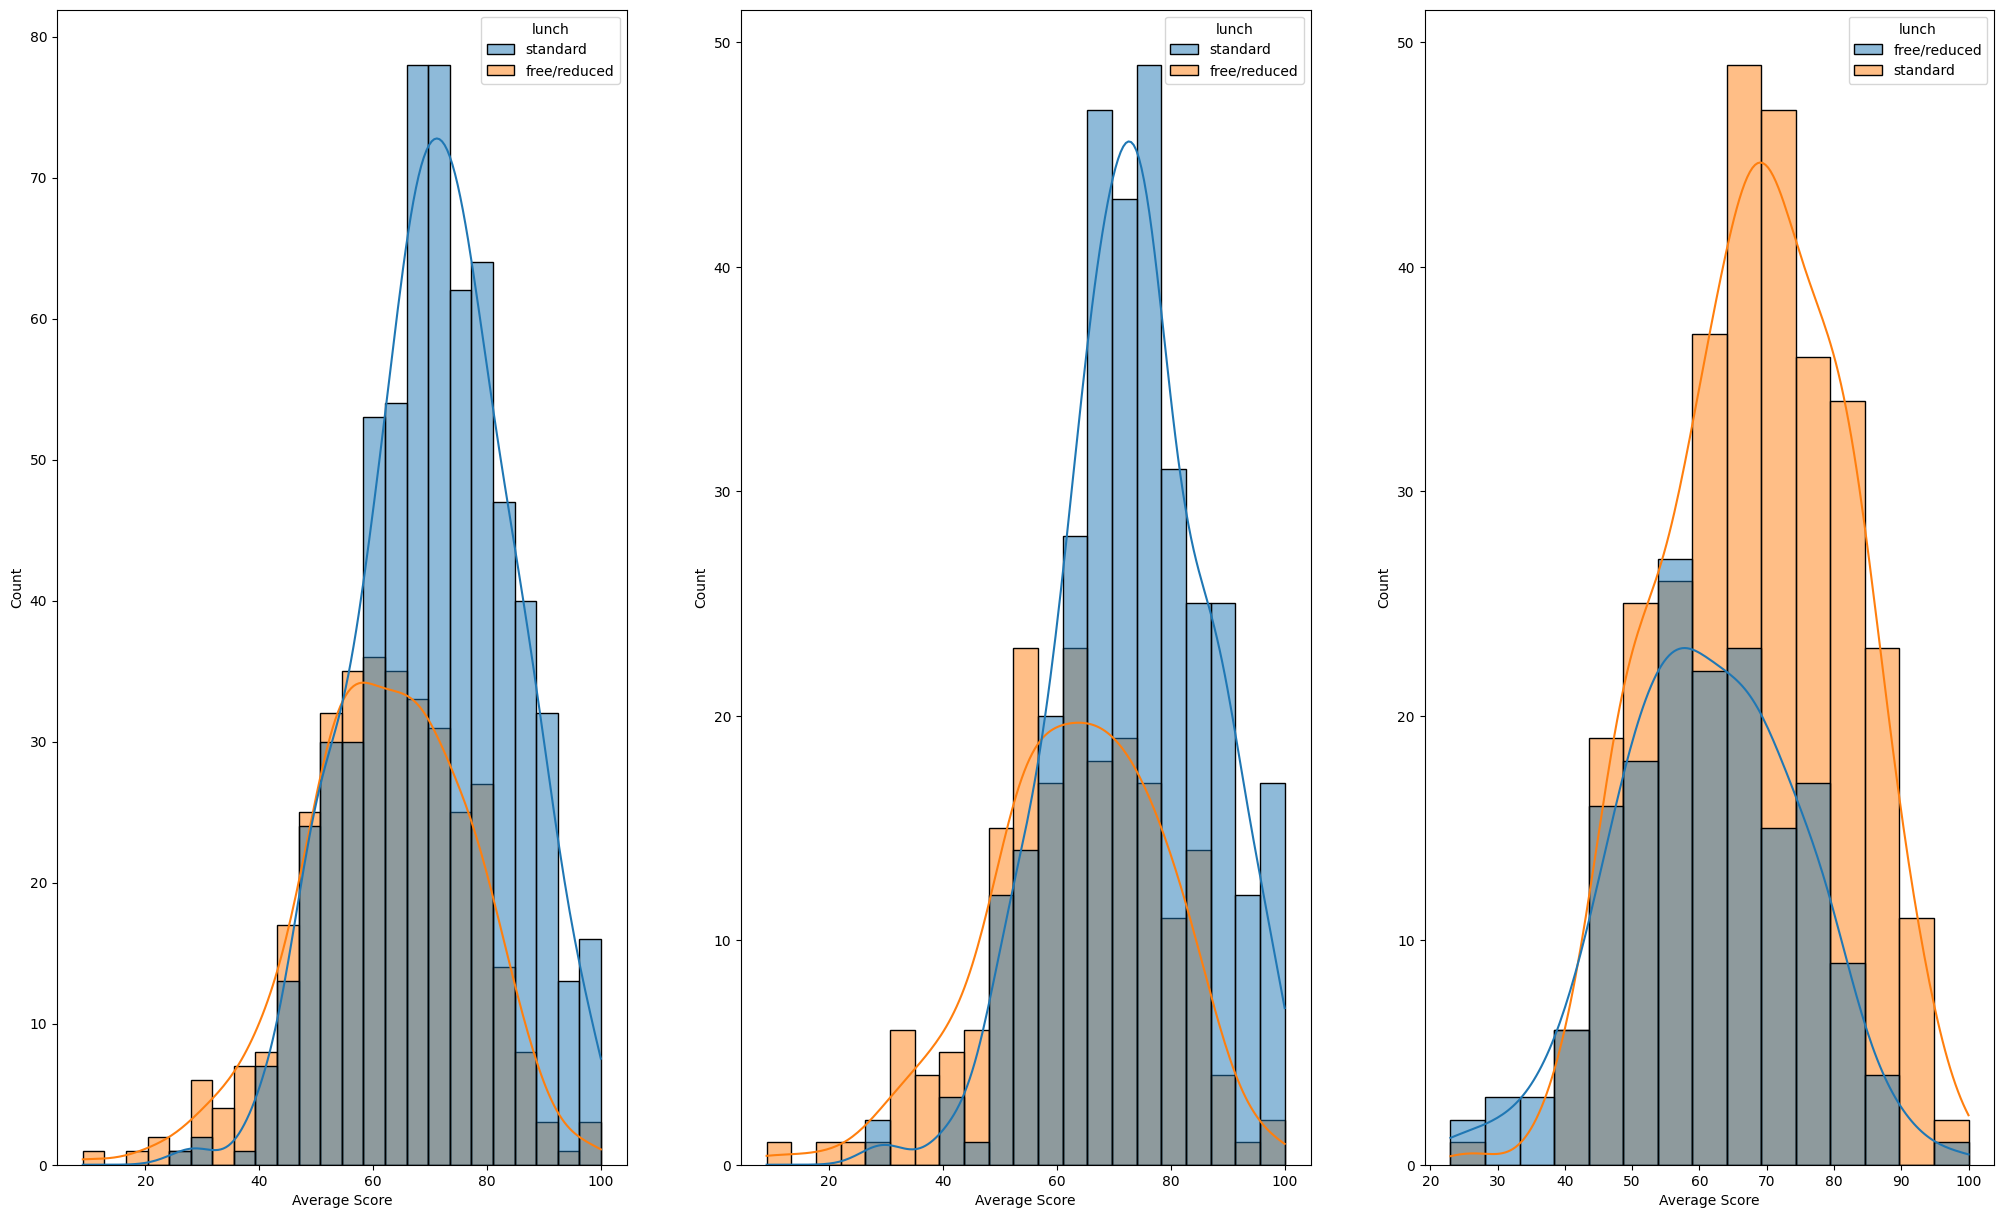

In [21]:
plt.subplots(1,3 , figsize=(25,15))
plt.subplot(1,3,1)
sns.histplot(data=df , x = 'Average Score' , hue = 'lunch' , kde=True)
plt.subplot(132)
sns.histplot(data = df[df['gender'] == 'female'] , x = 'Average Score' , hue = 'lunch' , kde=True )
plt.subplot(133)
sns.histplot(data = df[df['gender'] == 'male'] , x = 'Average Score' , hue = 'lunch' , kde=True )

Stanard Lunch boost exams irrespective of gender

<Axes: xlabel='Average Score', ylabel='Count'>

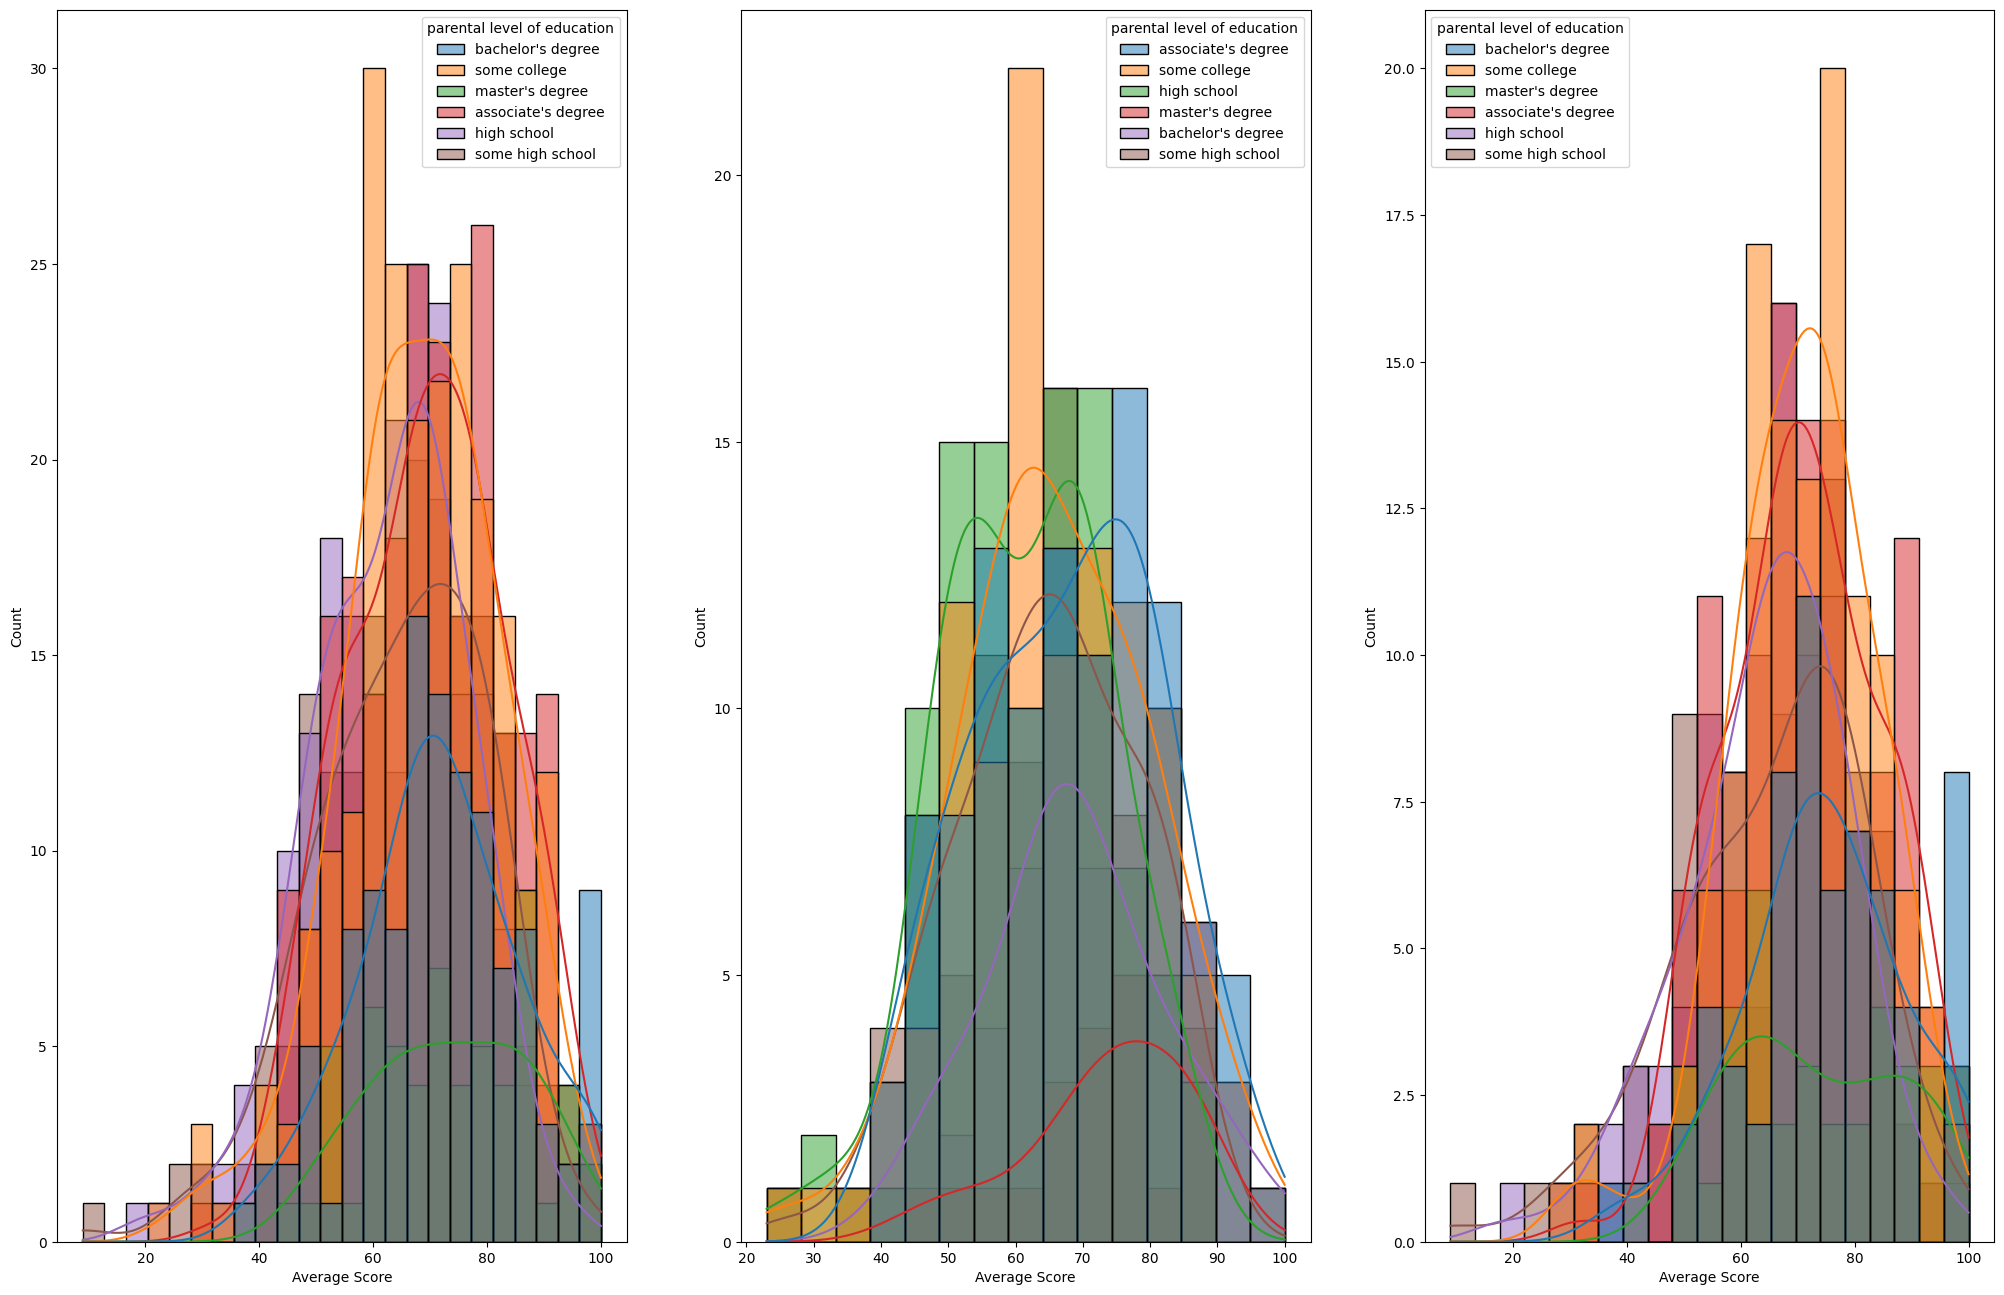

In [22]:
## Visulaisation based on parental level education:
plt.subplots(1,3,figsize =(25,16))
plt.subplot(131)
sns.histplot(data=df, x = 'Average Score' , hue='parental level of education', kde =  True)
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x = 'Average Score' , hue='parental level of education', kde =  True)
plt.subplot(133)
sns.histplot(data=df[df['gender'] =='female'], x = 'Average Score' , hue='parental level of education', kde =  True)

<Axes: xlabel='Average Score', ylabel='Count'>

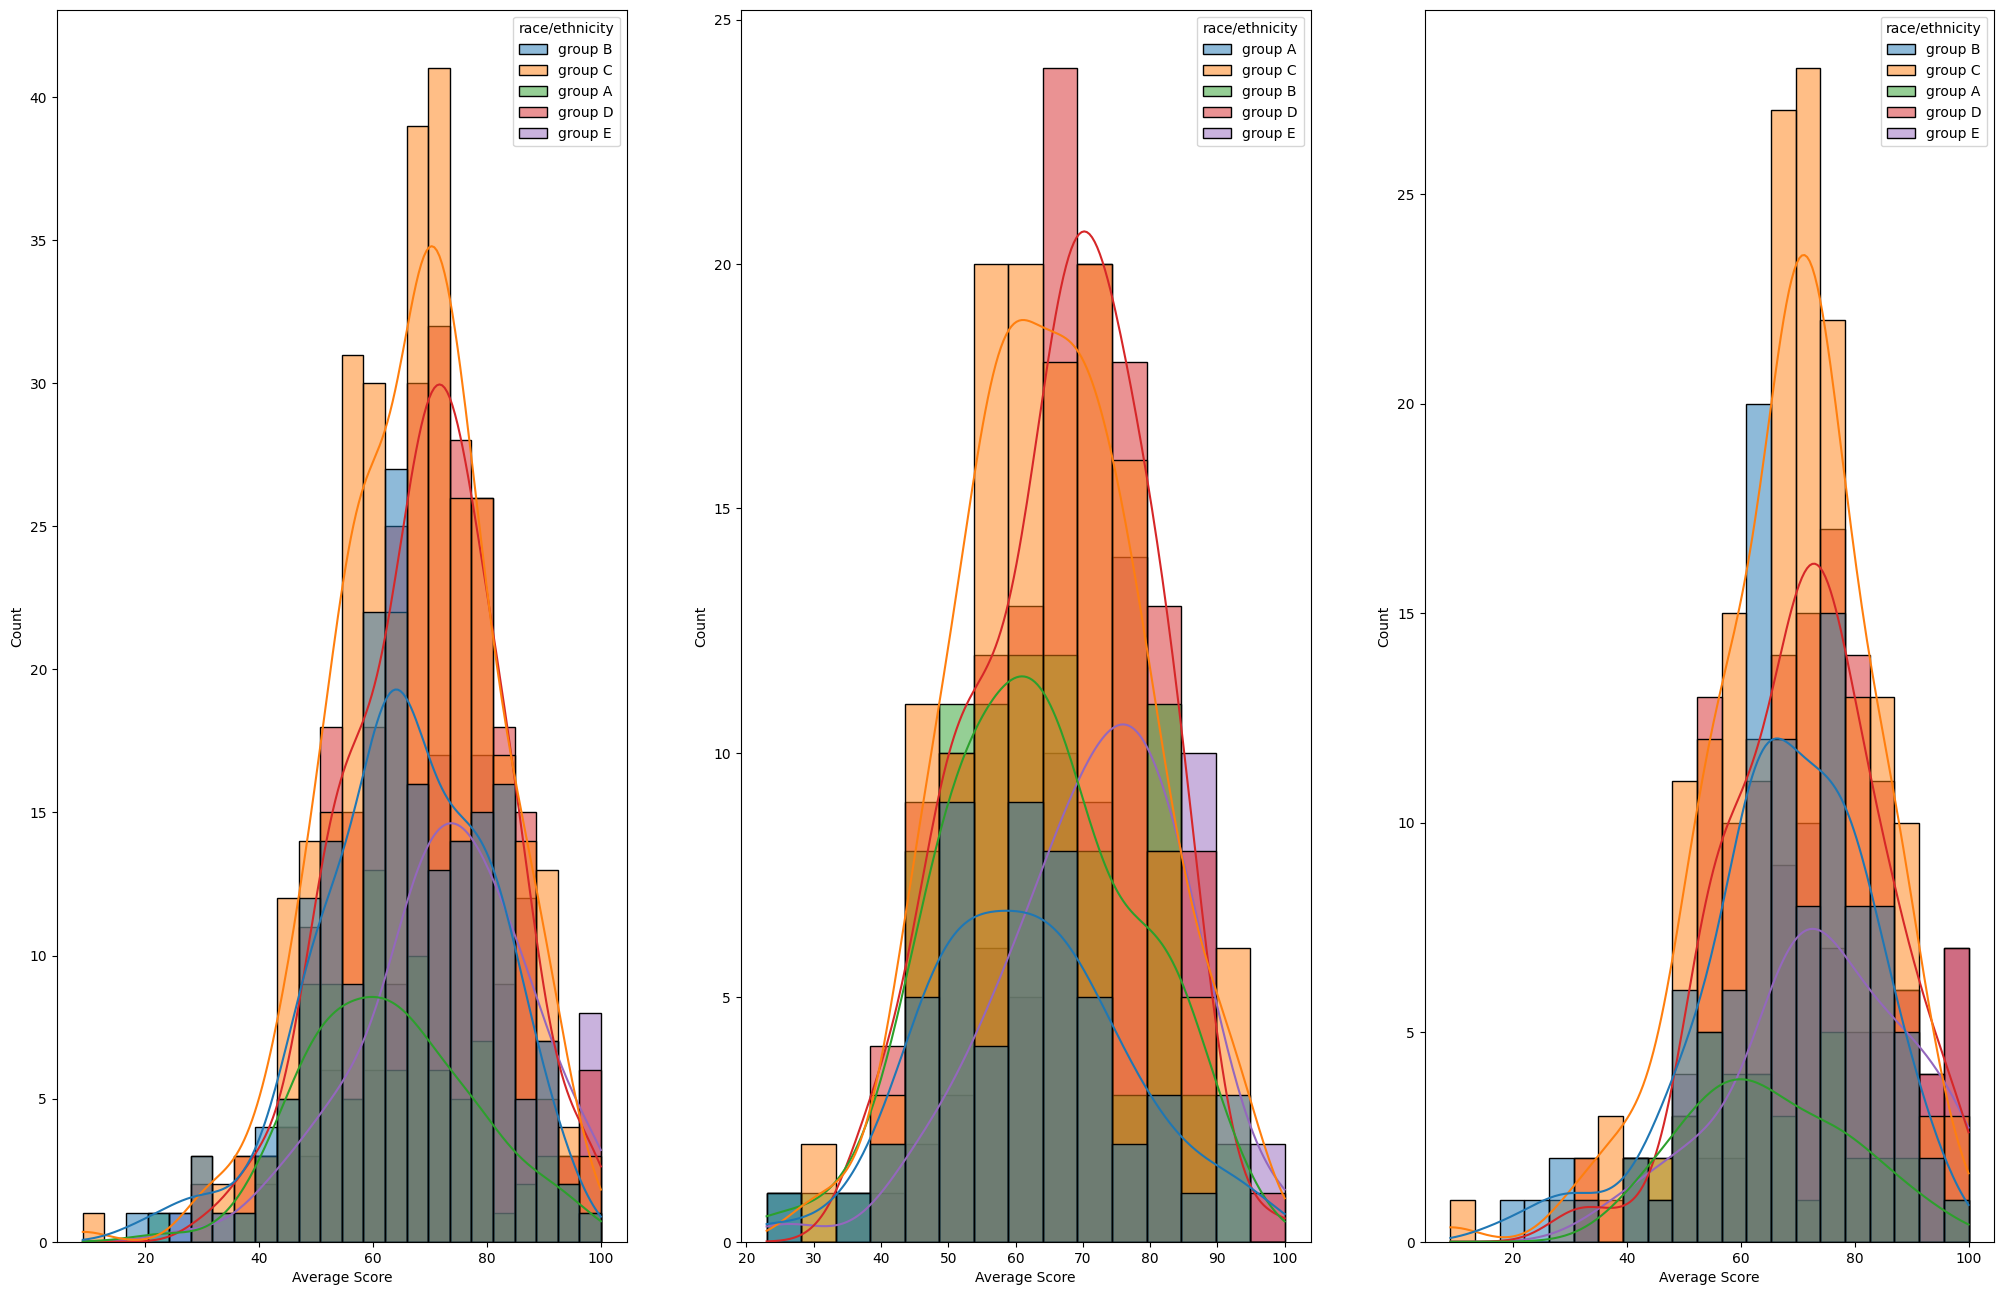

In [23]:
## Visulaisation based on race/ethnicity:
plt.subplots(1,3,figsize =(25,16))
plt.subplot(131)
sns.histplot(data=df, x = 'Average Score' , hue='race/ethnicity', kde =  True)
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x = 'Average Score' , hue='race/ethnicity', kde =  True)
plt.subplot(133)
sns.histplot(data=df[df['gender'] =='female'], x = 'Average Score' , hue='race/ethnicity', kde =  True)

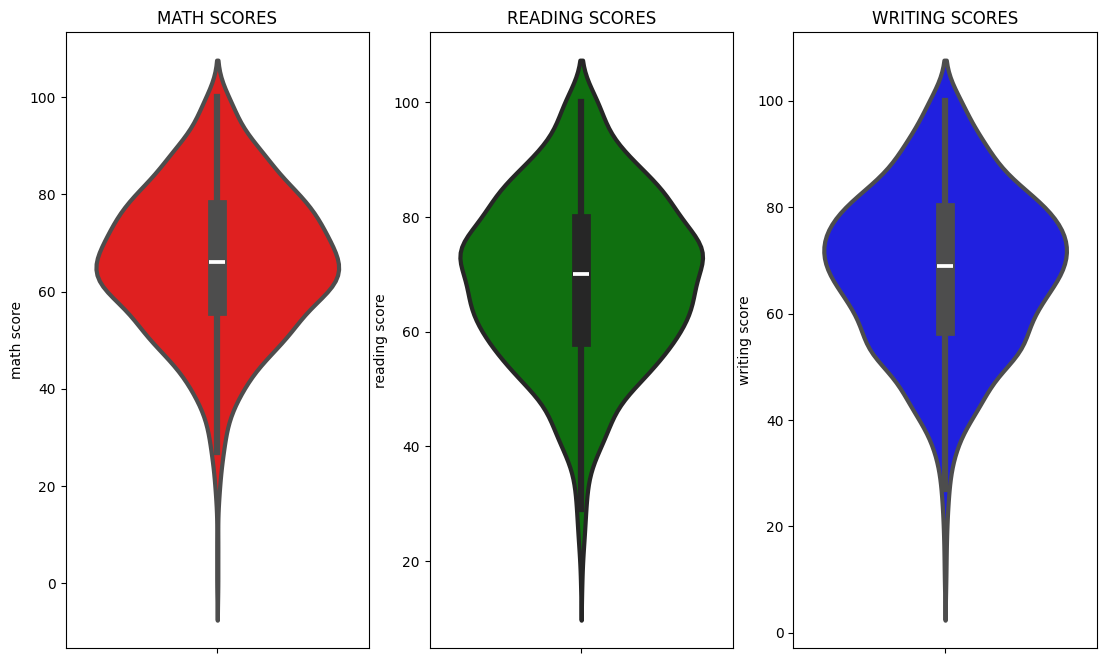

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80


([<matplotlib.patches.Wedge at 0x252eee5bb10>,
 [Text(0.8341981217126275, 0.7170170805016602, 'some college'),
  Text(-0.5717991703403216, 0.9397051180014506, "associate's degree"),
  Text(-1.0543739484534982, -0.31352125417996846, 'high school'),
  Text(-0.11383556858464056, -1.0940939005976644, 'some high school'),
  Text(0.8112644763512108, -0.7428660373247628, 'bachelors degree'),
  Text(1.0811581674205557, -0.20272399221558807, "master's degree")],
 [Text(0.4550171572977968, 0.3911002257281783, '22.6%'),
  Text(-0.3118904565492663, 0.5125664280007912, '22.2%'),
  Text(-0.575113062792817, -0.1710115931890737, '19.6%'),
  Text(-0.062092128318894844, -0.5967784912350896, '17.9%'),
  Text(0.4425078961915695, -0.40519965672259783, '11.8%'),
  Text(0.5897226367748485, -0.11057672302668439, '5.9%')])

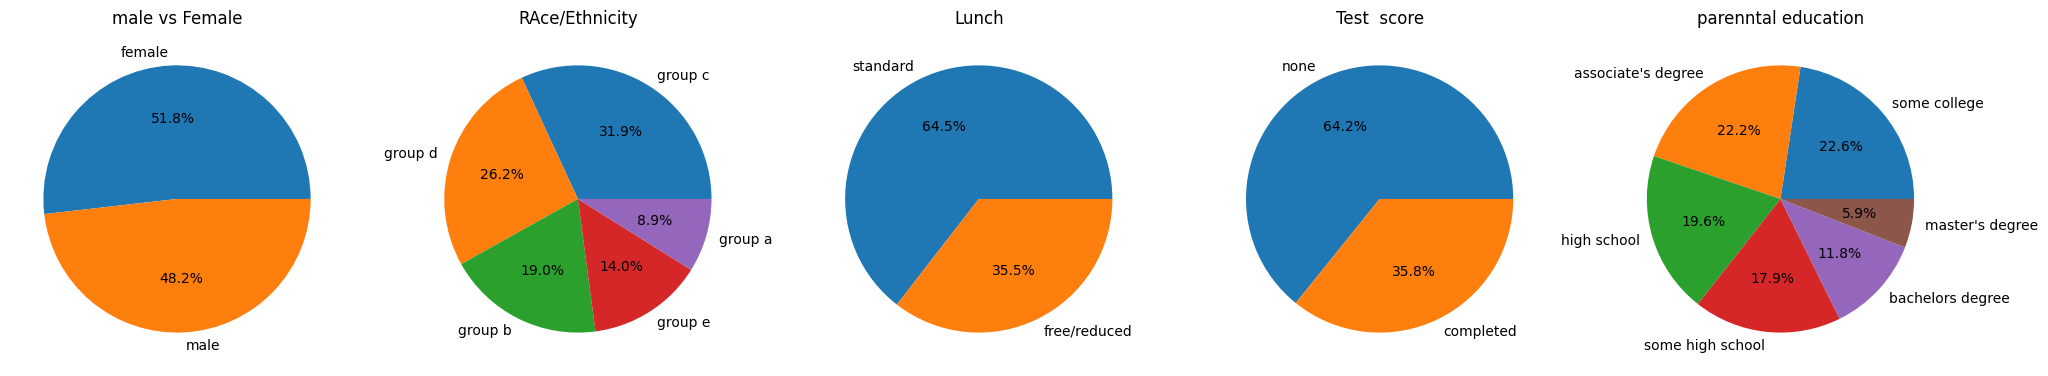

In [25]:
#pie plots:
plt.subplots(1,5, figsize = (25,16))
plt.subplot(1,5,1)
plt.title("male vs Female")
plt.pie(list(df['gender'].value_counts()), labels = list(df['gender'].unique()) , autopct='%1.1f%%')

plt.subplot(1,5,2)
plt.title("RAce/Ethnicity")
plt.pie(list(df['race/ethnicity'].value_counts()) , labels = list(['group c', 'group d', 'group b', 'group e' , 'group a']) , autopct='%1.1f%%')

plt.subplot(1,5,3)
plt.title("Lunch")
plt.pie(list(df['lunch'].value_counts()) , labels = list(['standard', 'free/reduced']) , autopct='%1.1f%%')

plt.subplot(1,5,4)
plt.title("Test  score")
plt.pie(list(df['test preparation course'].value_counts()) , labels = list(['none', 'completed']) , autopct='%1.1f%%')

plt.subplot(1,5,5)
plt.title("parenntal education")
plt.pie(list(df['parental level of education'].value_counts()) , labels = list(['some college', "associate's degree" ,"high school", "some high school", "bachelors degree" , "master's degree" ]) , autopct='%1.1f%%')



In [26]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

0.518 0.482


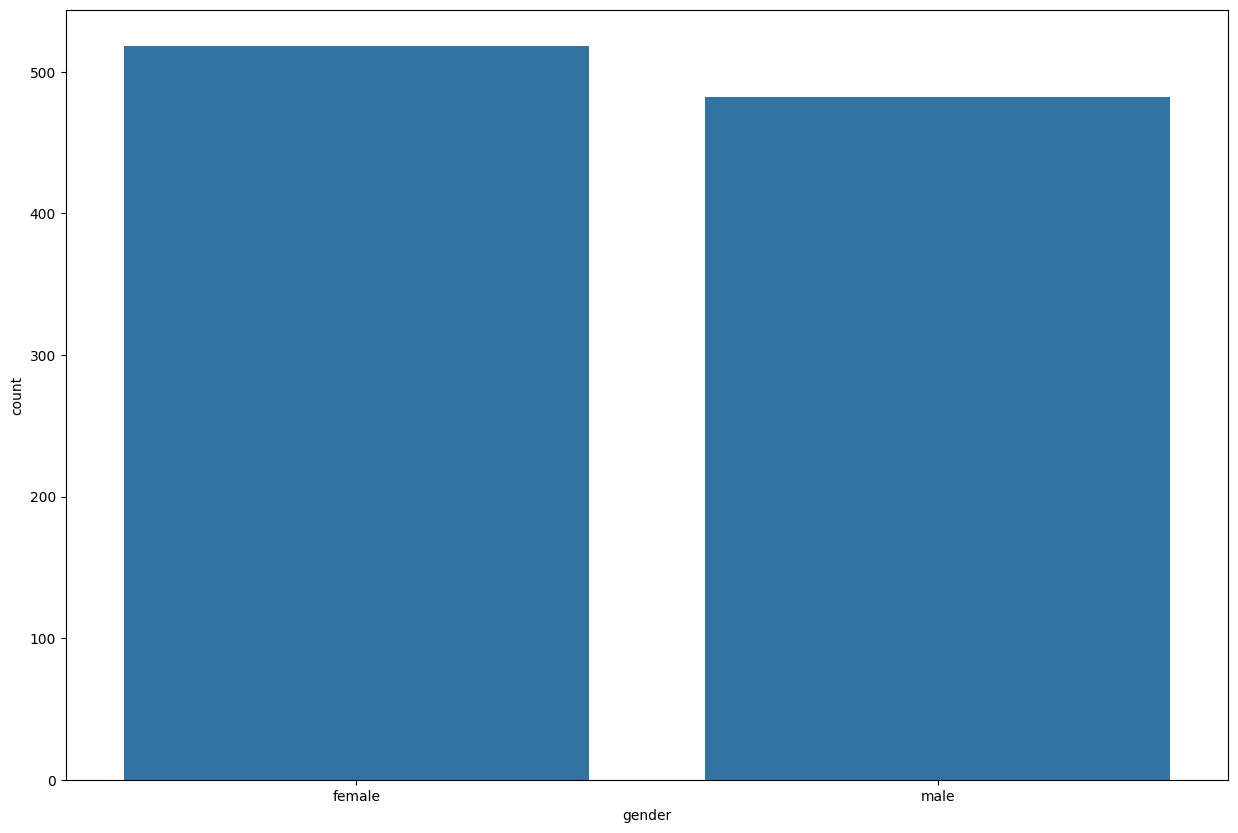

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x = 'gender')
x,y = df.gender.value_counts(normalize=True)
print(x,y)

Gender column appears to be balanced with female 51.8% and male 48.2%

In [35]:
gen_data = df.groupby(by='gender')
gendata = pd.DataFrame(gen_data.mean(numeric_only=True))

<Figure size 1000x600 with 0 Axes>

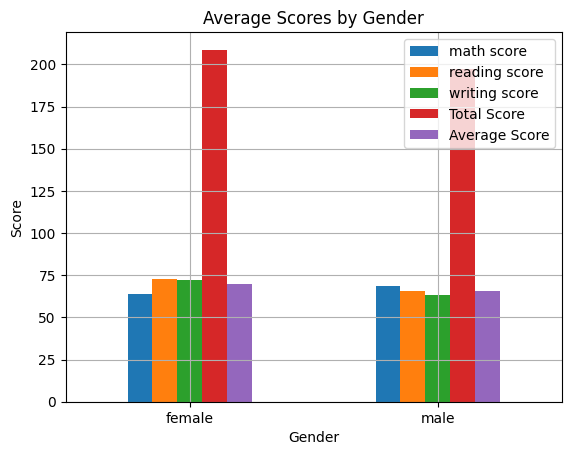

In [49]:
plt.figure(figsize=(10, 6))
gendata.plot(kind='bar')
plt.title("Average Scores by Gender")
plt.ylabel("Score")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

On an average females have a better overall score than men.
whereas males have scored higher in Maths.

<Axes: xlabel='race/ethnicity', ylabel='count'>

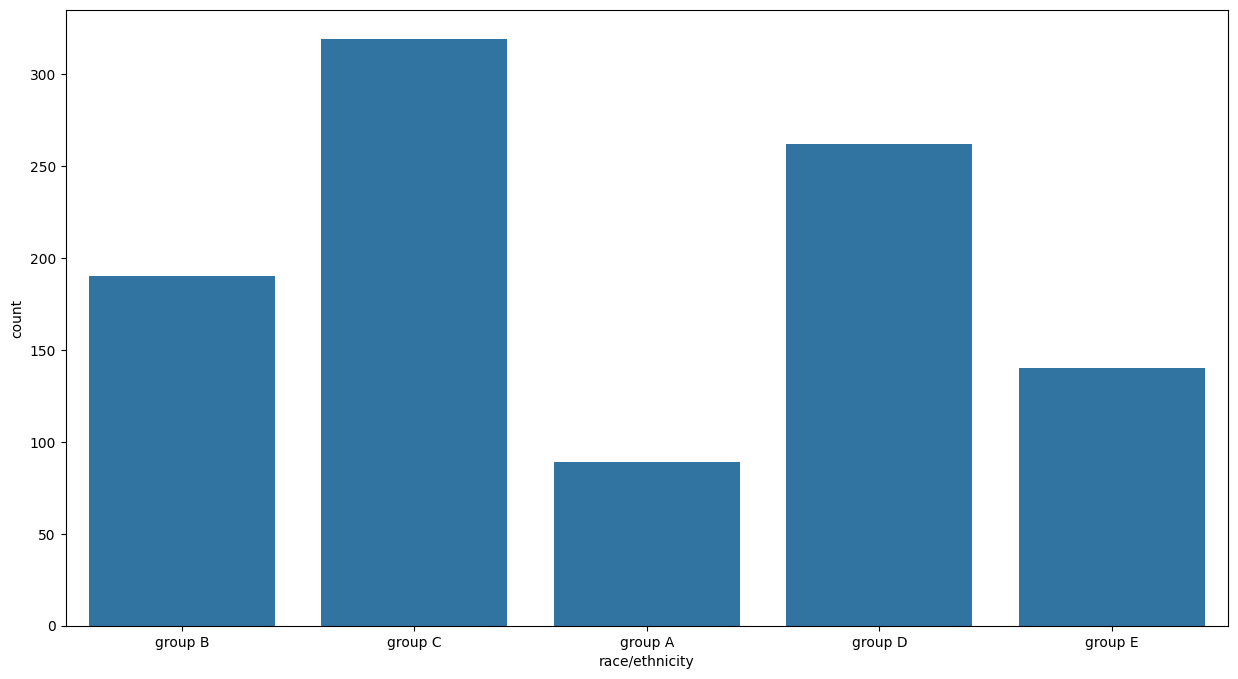

In [56]:
plt.figure(figsize=(15,8))
sns.countplot(data= df , x = 'race/ethnicity' )

Insights
Most of the student belonging from group C /group D.
Lowest number of students belong to groupA.

In [60]:
cat_data = df.groupby(by='race/ethnicity')
catdata= pd.DataFrame(cat_data.mean(numeric_only=True))
catdata

,math score,reading score,writing score,Total Score,Average Score
race/ethnicity,,,,,
group A,61.629213,64.674157,62.674157,188.977528,62.992509
group B,63.452632,67.352632,65.600000,196.405263,65.468421
group C,64.463950,69.103448,67.827586,201.394984,67.131661
group D,67.362595,70.030534,70.145038,207.538168,69.179389
group E,73.821429,73.028571,71.407143,218.257143,72.752381


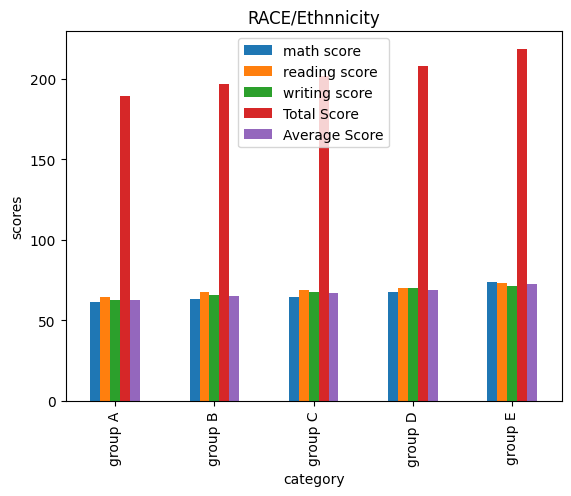

In [63]:
catdata.plot(kind='bar')
plt.title("RACE/Ethnnicity")
plt.xlabel("category")
plt.ylabel('scores')
plt.legend()
plt.show()

Insights
Group E students have scored the highest marks.
Group A students have scored the lowest marks.
Students from a lower Socioeconomic status have a lower avg in all course subjects

<Axes: xlabel='count', ylabel='parental level of education'>

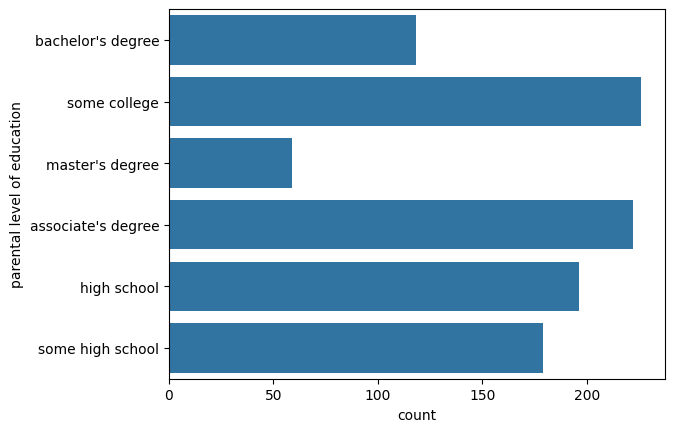

In [68]:
sns.countplot(data=df , y  = 'parental level of education')

Largest number of parents are from some college.


<Axes: xlabel='parental level of education'>

<Figure size 2500x1800 with 0 Axes>

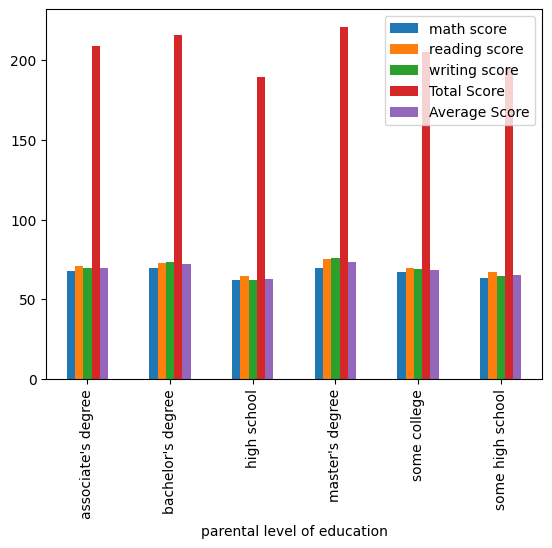

In [77]:
parent_ed_imp = df.groupby(by = 'parental level of education')
p = pd.DataFrame(parent_ed_imp.mean(numeric_only=True))
plt.figure(figsize=(25,18))
p.plot(kind  = 'bar')

Insights
The score of student whose parents possess master and bachelor level education are higher than others.

0.645 0.355


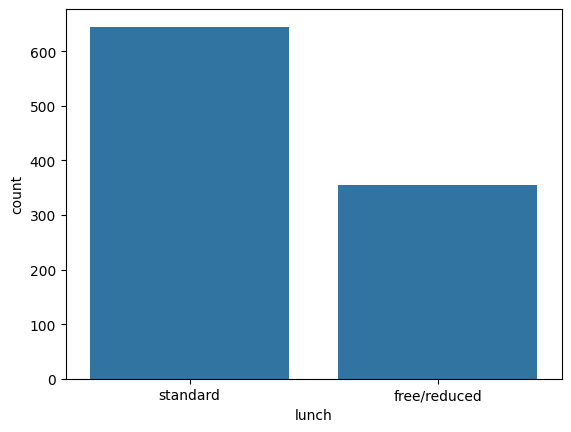

In [82]:
lunch = df.groupby(by = 'lunch')
sns.countplot(data = df, x = 'lunch')
a,b = df.lunch.value_counts(normalize=True)
print(a,b)

Students being served Standard lunch was more than free lunch
Standard lunch : 64.5%
Free Lunch :  35.5%

<Axes: xlabel='lunch'>

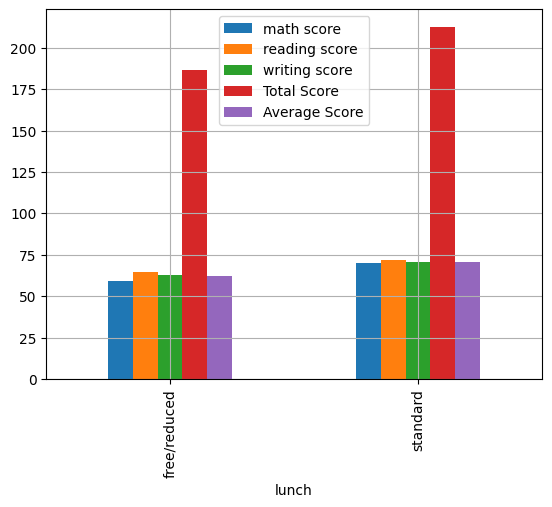

In [87]:
l = pd.DataFrame(lunch.mean(numeric_only=True))
l
l.plot(kind = 'bar' , grid= True)


Insights
Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

In [88]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total Score', 'Average Score'],
      dtype='object')

<Axes: xlabel='test preparation course'>

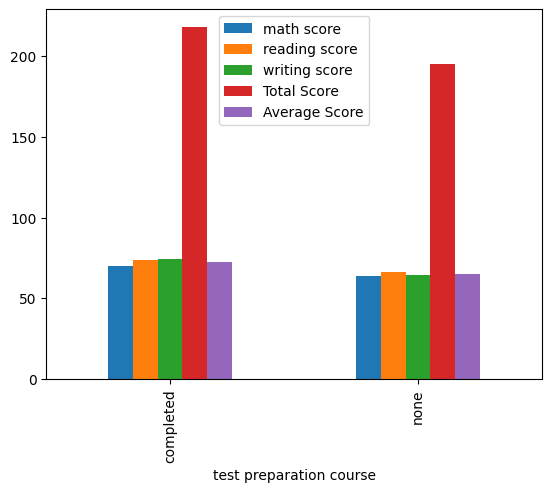

In [98]:
test = df.groupby(by = 'test preparation course')
t = pd.DataFrame(test.mean(numeric_only=True))
t.plot(kind = 'bar')

Insights:
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course